<span><br><br><br></span>

<h1 align='center' style='margin-bottom: 0px'>The state of Food Security in Sub-Saharan Africa</h1>
<h3 align='center' style='margin-top: 10px'> The analysis off the effects of environmental hazards and food security in Sub-Saharan Africa</h3>

In [2]:
import plotly
plotly.tools.set_credentials_file(username='robdregmans', api_key='zgwY480qDZBEkGhJOHZD')

In [ ]:
from IPython.display import Image
Image(filename='Report afbeelding 1.jpg')


<h4 align='right', style='margin-bottom': 0px'> 27 October 2018, The Hague</h4>
<h4 align='right', style='margin-top: 3px'> Ivar Tjallingii, Rob Dregmans, Martijn van Vliet</h4>

In [101]:
#setting up the colors. the p before the colors stands for 'plotly', because this are plotly's standard colors
pblue = 'rgb(31,119,180)'
porange = 'rgb(255,127,14)'
pgreen = 'rgb(44,160,44)'
pred = 'rgb(214,39,40)'
ppurple = 'rgb(148,103,189)'
pbrown = 'rgb(140,86,75)'

In [ ]:
#for Ivar
os.chdir("C://Users//ivarnieuwepc//Documents//GitHub//Data")

In [4]:
#for Rob
os.chdir("C:\\Users\\Rob\\Documents\\GitHub\\data")

In [ ]:
#for Martijn
os.chdir('/Users/Martijn/Documents/GitHub/data')

<h2 align='left' style='margin-bottom: 0px'>Table of Contents</h2>
<h4 align='left' style='margin-top: 20px'>   - Chapter 1 - Introduction to food security in Sub-Saharan Africa</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 2 - Methodology & Research questions</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 3 - Data Preparation</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 4 - Data Analysis</h4>
<h4 align='left' style='margin-top: 5px'> - Chapter 5 - Policy recommendation</h4>


<h2 align='left' style='margin-bottom: 0px'>Chapter 1 - Introduction to food security in Sub-Saharan Africa</h2>

The world has committed themselves stopping hunger in the world by 2030 adopted in 215. The goal to stop the prevalence of hunger forms Sustainable Development Goal (SDG) number two of the total seventeen SDG's set up in the 2030 Agenda for Sustainable Development. These goals provide a blueprint for peace and prosperity for people and the planet [2]. We have to rethink how we grow, share and consume our food. Only then agriculture, forestry and fisheries can provide food for all people around the world and generate decent incomes, while supporting people-cantered, rural development and protecting the environment [3].

<h3 align='left' style='margin-bottom: 0px'>SDG 2 - Targets</h3>
To act on this goal to obtain enough food for everyone and stopping other negative side effects, five main targets have been set out for 2030 by all United Nations Member States[1]:

- 2.1: End hunger and ensure access by all people
- 2.2: End all forms of malnutrition, including achieving targets on stunting and wasting 
- 2.3: Double the agricultural productivity and incomes of small-scale food producers
- 2.4: Ensure sustainable food production systems and implement resilient agricultural practices that increase productivity and production.
- 2.5: Maintain the genetic diversity of seeds, cultivated plants and farmed and domesticated animals and their related wild species.

Malnutrition and related effects slow down development within whole countries. Hunger and malnutrition have a ripple effect that slow down and freezes development. Especially for children, the effects of malnutrition can last a lifetime. Poor nutrition affects physical and mental development which can have a tremendous negative effect on the development of individuals and hereby the economic output of a country [5].

<h3 align='left' style='margin-bottom: 0px'>Recent developments </h3>
Since 1990, the prevalence of hunger has fallen across most regions. Globally, hunger has fallen from 14.7 percent in 2000 to 10.9 percent in 2017. But the progress has not been consistent for the whole period. Global hunger reached its lowest levels in 2015 but has now risen to 10.8 and 10.9 percent in 2016 and 2017 [4]. This increase in hunger levels are largely a result of increases in Sub-Saharan Africa and minor increases in South America [5]. Also, the UN FAO linked the increase of PoU to the rise in conflicts which often leads to famine, and climate factors such as the El Niño phenomenon and climate change which could be the cause of more climate related hazards [6]. 

<h3 align='left' style='margin-bottom: 0px'>Sub Saharan Africa </h3>
Chronic undernourishment is widespread throughout the region of Africa, see figure X. Almost X percent of the population of Sub Saharan Africa are undernourished. The region remain exposed to food crises and famines triggered by droughts, floods, pest, economic downturns and conflicts. Sub-Saharan Africa is the only region of the world, where it is expected that the state of hunger will worsen over the coming decades [7].

This is why Sub Saharan Africa is our scope of this data exploration paper. The goal of this report is to gain more insight in the data behind the rising hunger in Sub Saharan Africa. What is the detailed current state of hunger in SSA, what is causing it and which policy options need to be worked out that counteract the current trend of rapid rise of hunger, famine and its related side effects. Only when we have this knowledge then, Sub Saharan Africa can achieve the proper economic development to rise up from poperty and catch on with the other parts of the developing world.  


### Sources:

[1] https://www.un.org/sustainabledevelopment/hunger/

[2] https://sustainabledevelopment.un.org/?menu=1300

[3] http://www.fao.org/state-of-food-security-nutrition/en/

[4] https://ourworldindata.org/hunger-and-undernourishment

[5] FAO, IFAD, UNICEF, WFP and WHO. 2017. The State of Food Security and Nutrition in the World 2017. Building resilience for peace and food security. Rome, FAO. Available online.

[6] FAO, IFAD, UNICEF, WFP and WHO. 2018. The State of Food Security and Nutrition in the World 2018. Building climate resilience for food security and nutrition. Rome, FAO. Available online.

[7] FAO Food Security and Agricultural Development in Sub Saharan Africa - Building a case for more public support Policy Brief No. 1



# Chapter 2 - Methodology & Research questions

In this chapter the methodology and research questions are described. As first, an insight is given in the methodologies used. As second the main research question and subquestions are explained. 

## Methodology
Python is used as the methodology within this project. Python as a programming language is used in the environment of Jupiter Notebook. During the project there are installed a couple of packages to extand the possibilities within Python. The packages imported into the Jupiter Notebook can be found below: 

__@ROB --> Hier misschien alles importeren, dan kunnen de (externe) pakketten even kort worden toegelicht?__ 



In [ ]:
#Setting up the working environment
import os
import pandas as pd
import numpy as np
import itertools
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns

from pathlib import Path
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter

%matplotlib inline

Some of these packages were not included in Python and had to be installed externally. The package plotly is used for visualizing the graphs. In Plotly the visualisations are displayed in a effeciënt way and we experienced that within plotly there are many possibilities to visualize the data. 

__statsmodels: nog in te vullen door @Martijn mits grafiek in verslag__

## Research questions
In Sub-Saharan Africa the sustainable development goal of zero hunger is very important, as a lot of people will not have enough food. This threat combined with environmental hazards can let to an increase in people that are in need of food. The combination of datasets about the SDG and datasets about environmental hazards can show us if there is an relation between these trends. To find an answer for this trends, the research question is as follows:

_'To what extent is hunger in sub-Saharan Africa related to environmental hazards and how will this trend develop until 2030 under the effects of climate change?'_

In order to answer this research question several subquestions are defined:
- How did food security develop in the last decades (for sub-Saharan Africa)?
- What has been the historic trend of environmental hazards in sub-Saharan Africa?
- What is the impact of environmental hazard on the food systems?
- How will the change in environmental hazards affect the food production output? __hebben we dit gedaan??__
- Which policies could counteract these negative effects on food production?

First the food security and environmental hazards will be looked at seperatly. The food security is explained by different indicators, such as '% of undernourishment' and the 'Cereal Yield (kg per Hectare)'. As well indicatiors as the total population combined with the total food production can give a good insight in how the food security has developed the last decades. For the environmental hazards ... __@Ivar kan jij hier zeggen wat voor indicators / grafieken er worden verwacht?__

When both are described there will be looked at the impact of environmental hazards on the food systems. So does more environmental hazards mean less food security? If so, which food systems get affected the most? When you know environmental harzards affect the food systems there can be looked at how this affects the food production output. At last the will be looked at what kind of policies can be implemented so we assure Sub-Saharan Africa of food security.

<h2 align='left' style='margin-bottom: 0px'>Chapter 3 - Data Preparation</h2>

For our analyses to answer our research question we use among others the WDI Data. However, the WDI Data is from all the countries over the world and all the regions. Since we only need the countries in Sub-Saharan Africa and the region Sub-Saharan Africa itself (this is just the average of all the countries in Sub-Saharan Africa) we need to select only those data. To compare Sub-Saharan Africa we also included the region 'World'.
Unfortenaly the WDI Data does not contain the data about the region of every country, so we cannot, with only the WDI Data, extract all the countries in Sub-Saharan Africa. We use another datafile that contains all the countries and all their regions to extract a list with all the countries in Sub-Saharan Africa. We then use this list to create a DataFrame from the WDI Data containing only the data of those countries and the two regions 'Sub Saharan Africa' (SSF) and 'World' (WLD).

In [5]:
dfc = pd.read_csv("countriescodes.csv", sep = ",", encoding = 'latin-1')
l = dfc[dfc['sub-region'] == "Sub-Saharan Africa"]["alpha-3"]
region = pd.Series(["SSF","WLD"])
l = l.append(region)
WDI = pd.read_csv("WDI/WDIData.csv")
WDI_SSA = WDI[WDI["Country Code"].isin(l)]

No that we have the right DataFrame, we can modify the data further to make it specific to the graphs we want to create. This involves procedures like

- Selecting only one or a few indicators
- Selecting only the regions, or only the countries
- Selecting a time range
- Melting the data in a long format, which is convenient for plotting the data
- Dropping al the rows where the values are missing

It makes sense to melt the data as one of the lasts steps, because in that way you only use computational power for the data that you want to keep. After having the data melted, it is simple to drop the rows with NA values. The indicators, countries and regions we need differ per graph, therefore this is done previous to plotting each graph in chapter 4.


Hier moet Ivar even vertellen over de EM-DAT database en de bewerkingen die die uitgevoerd heeft
Hieronder kan dan daar de code voor worden ingevoegd

<h2 align='left' style='margin-bottom: 0px'>Chapter 4 - Data Analysis</h2>
According to FAO [bron] there are five indicators that tell us how the zero hunger indicators are developing over the past 7 years. We show them below.

In [29]:
#bar charts for hunger indicators
stunting = "SH.STA.STNT.ZS"
wasting = "SH.STA.WAST.ZS"
overweight = "SH.STA.OWGH.ZS"
anemia = "SH.ANM.ALLW.ZS"
exclusive_breastfeeding = "SH.STA.BFED.ZS"
#add all the indicators for zero hunger in a list
li = [["SH.STA.STNT.ZS"],["SH.STA.WAST.ZS"],["SH.STA.OWGH.ZS"],["SH.ANM.ALLW.ZS"],["SH.STA.BFED.ZS"]]
indi = []
#get the data in the right format for all the indicators via a for-loop
for i in range(0,5):
    WDI_SSA_I = WDI_SSA[WDI_SSA["Indicator Code"].isin(li[i])]
    #get all the necessary columns
    SSA_10_17 = pd.concat([WDI_SSA_I.loc[:,'Country Name':'Indicator Code'],WDI_SSA_I.loc[:,'2010':'2017']], axis=1)
    #melt the data into a long format
    melted = pd.melt(SSA_10_17, id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], var_name="Year", value_name="Value")
    #plot indicator over time for one country
    ll = [ 'Sub-Saharan Africa','World']
    #get only the two regions above and sort them
    mc = melted.loc[melted['Country Name'].isin(ll)] 
    mc = mc.sort_values(["Country Name", "Year"])
    #create two traces, for each region 1
    trace1 = go.Bar(
        x = mc[mc["Country Name"] == 'World']["Year"],
        y = mc[mc["Country Name"] == 'World']["Value"],
        name = 'World',
        legendgroup = 'a',
        showlegend = False,
        marker=dict(color=pblue), 
    )
    trace2 = go.Bar(
        x = mc[mc["Country Name"] == 'Sub-Saharan Africa']["Year"],
        y = mc[mc["Country Name"] == 'Sub-Saharan Africa']["Value"],
        name = 'Sub-Saharan Africa',
        legendgroup = 'b',
        showlegend = False,
        marker=dict(color=porange), 
    )
    #add the two traces together and add them to indi
    data = [trace1, trace2]   
    indi.append(data)
#plot all the bar charts 
fig = tools.make_subplots(rows=1, cols=5, subplot_titles=('Stunting', 'Wasting', 'Overweight', 'Anemia', 'Exclusive Breastfeeding'), print_grid = False)
for i in range(0,5):
    fig.append_trace(indi[i][0], 1, i+1)
    fig.append_trace(indi[i][1], 1, i+1)
fig['layout'].update(height=300, width=900, title='Indicators for zero hunger from 2010 till 2017')
py.iplot(fig, filename='zero-hunger-indicators')

Uitleg over de begrippen en observaties 

Stuk van Martijn

In [7]:
df = pd.melt(WDI_SSA,id_vars = ["Country Name","Country Code","Indicator Name","Indicator Code"], var_name = "Years")
# Sort the values first by Country Name and then by Years
df = df.sort_values(["Country Name", "Years"])

In [31]:
def data_return(indicator_code, mode):
    df_und = df[df["Indicator Code"] == indicator_code]
    df_und = df_und.dropna()
    x = df_und[df_und["Country Name"] == 'World']["Years"]
    y1 = df_und[df_und["Country Name"] == 'World']["value"]
    y2 = df_und[df_und["Country Name"] == 'Sub-Saharan Africa']["value"]

    trace0 = go.Scatter(
        x = x,
        y = y1,
        mode = mode,
        name = "World",
        marker = dict(color = pblue, line = dict(color = pblue))
    )
    trace1 = go.Scatter(
        x = x,
        y = y2,
        mode = mode,
        name = "Sub-Saharan Africa",
        marker = dict(color = porange, line = dict(color = porange))
    )
    data = [trace0,trace1]
    return data

In [32]:
def data_plot(indicator_code,title,ytitle,yrange, mode):
    data = data_return(indicator_code, mode)
    
    layout = dict(title = title,
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = ytitle,
                          range = [0,yrange]),
              )

    fig = dict(data=data, layout=layout)
    plot = py.iplot(fig, filename='line-mode')
    return plot

In [33]:
data_plot(indicator_code ='SN.ITK.DEFC.ZS',
          title = 'Undernourishment in Sub-Saharan Africa vs. the World',
          ytitle = '% Undernourishment',
          yrange = 30,
          mode = "lines + markers")

In [11]:
data_plot(indicator_code = 'AG.YLD.CREL.KG',
          title = 'Cereal Yield in Sub-Saharan Africa vs. the World',
          ytitle = 'Cereal Yield (kg per hectare)',
          yrange = 4500,
          mode = "lines + markers")

In [260]:
data_plot(indicator_code ='SN.ITK.DFCT',
          title = 'Depth of the food deficit in Sub-Saharan Africa and the World',
          ytitle = 'Kilocalories per person per day',
          yrange = 250,
          mode = "lines + markers")

We are interested in if there are any differences between population growth and the development of food production. Is food production for example lacking behind on population growth? Or is the food production growing faster than the population growth and is that why the food deficit is declining?
To get more insight, we first plot below the population growth and food production growth (as an index) of Sub-Saharan Africa and include the World for comparison.

In [35]:
pop = data_return('SP.POP.TOTL', "lines")
pro = data_return('AG.PRD.FOOD.XD', "lines")
fig = tools.make_subplots(rows=1, cols=2, shared_xaxes=True, subplot_titles=('Population', 'Food Production'), print_grid = False)
for i in range(0,2):
    fig.append_trace(pop[i], 1,1)
    fig.append_trace(pro[i], 1,2)
fig['layout'].update(height=500, width=950, title='Development of Population versus food production compared between the World and Sub-Saharan Africa', showlegend = False)
py.iplot(fig, filename='line-mode')

If we then want to check if there is a difference in population versus production we can compare the changes over the years. To do this for Sub-Saharan Africa, we first extract the data about the two indicators for Sub-Saharan Africa. Then we calculate the percentual change by diving year t=1 by year t=0, etc. We do this for both indicators and then divide the change of both indicators by each other over the years. We see the result in the graph below. A point above 1 means that the rate of change in population was that year higher than the change of rate in food production. For a point below 1 it is vica versa. We can conclude that the differences are marginal (the numbers swing between 0.95 and 1.04) and therefor that there is no abnormal difference between population growth and food production growth.

In [13]:
dfi = df[df["Indicator Code"] == 'SP.POP.TOTL']
dfi = dfi.dropna()
x = dfi[dfi["Country Name"] == 'World']["Years"]
ysp = dfi[dfi["Country Name"] == 'Sub-Saharan Africa']["value"]
dfi = df[df["Indicator Code"] == 'AG.PRD.FOOD.XD']
dfi = dfi.dropna()
x = dfi[dfi["Country Name"] == 'World']["Years"]
yag = dfi[dfi["Country Name"] == 'Sub-Saharan Africa']["value"]
lysp = []
for i in range(0,len(x)-1):
    change = ysp.iloc[i+1]/ysp.iloc[i]
    lysp.append(change)    
lyag = []
for i in range(0,len(x)-1):
    change = yag.iloc[i+1]/yag.iloc[i]
    lyag.append(change)
lyto = []
for i in range(0,len(lysp)):
    change = lysp[i]/lyag[i]
    lyto.append(change)
trace = go.Scatter(
    x = x,
    y = lyto,
    mode = 'lines',
    name = 'rate of change of population over rate of change of food production'
)
layout = dict(title = 'Rate of change of population over rate of change of food production',
              xaxis = dict(title = 'Years'),
              yaxis = dict(title = 'Ratio'),
             )
fig = dict(data = [trace], layout = layout)
py.iplot(fig, filename='zero-hunger-indicators')


In [99]:
def create_map_undernourishment(year):
    df_map = df[df["Indicator Code"] == 'SN.ITK.DEFC.ZS']
    df_map = df_map[df_map["Years"] == year]
    
    start_color = "rgb(242,200,200)"
    length = 6
    dif = 30
    color_list = []
    a = 0
    for i in range(0,length):
        k = int(start_color[12:15]) - dif * i
        m = int(start_color[8:11]) - dif * i
        new_value = start_color[0:8] + str(m) + ',' + str(k) + ')'
        color_list.append([a, new_value])
        a = a + 1/(length-1)
    scl = color_list

    df_map['text'] = df_map['Country Name']

    data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_map['Country Code'],
        z = df_map['value'],
        locationmode = 'ISO-3',
        text = df_map['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 1
            ) ),
        colorbar = dict(
            title = "% Undernourishment")
        ) ]

    layout = dict(
        title = 'Undernourishment in Sub-Saharan Africa in the year ' + year,
        geo = dict(
            scope='africa',
            showlakes = True,
            lakecolor = pblue, 
            showland = True,
            landcolor = 'rgb(220,220,220)')
             )
    fig = dict( data=data, layout=layout )
    plot = py.iplot( fig, filename='d3-cloropleth-map' )
    return plot

In [100]:
create_map_undernourishment('2000')

In [68]:
df_emd = pd.read_csv('disaster_data_africa_1960_2018_conv.csv', sep = ';', encoding = 'latin-1')
frec = df_emd.groupby(["year", "disaster type"])[['disaster type']].count()
frec = frec.rename({'disaster type':'frequency'}, axis='columns')
frec2 = df_emd.groupby( [ "year", "disaster type"] ).size().reset_index()
frec2.columns = ['year', 'type', 'frequency']
#selecting impact per type basis of costs, death and affected people
df_emd.columns = ['year', 'type', 'iso', ' country_name', 'occurrence',
       'Total deaths', 'Injured', 'Affected', 'Homeless', 'Total affected',
       'Total damage (US$)'] 
impact = df_emd.groupby(["year","type"])[['Total deaths','Total affected','Total damage (US$)']].sum().reset_index()
total_damage = impact.groupby(["year"]).sum().reset_index()
total_frequency = frec2.groupby(["year"]).sum().reset_index()

#different types of hazards
types = ["Flood","Landslide","Storm","Drought","Wildfire","Extreme temperature"]

#creating a dict with the right colors
color_dict = {}
for i in types:
    color_dict[i] = porange
color_dict["Drought"] = pblue

In [85]:
def regression_path(regression_data, y_column, order):
    rg=sns.regplot(y = y_column, x = "year", data = regression_data.astype(int), order = order)
    x=rg.get_lines()[0].get_xdata()       # x-coordinate of points along the regression line
    y=rg.get_lines()[0].get_ydata()       # y-coordinate of regression line
    P=rg.get_children()[1].get_paths()    #The list of Path(s) bounding the shape of 95% confidence interval-transparent
    p_codes={1:'M', 2: 'L', 79: 'Z'}      #dict to get the Plotly codes for commands to define the svg path
    path=''
    for s in P[0].iter_segments():
        c=p_codes[s[1]]
        xx, yy=s[0]
        path+=c+str('{:.5f}'.format(xx))+' '+str('{:.5f}'.format(yy))
    shapes=[dict(type='path',
             path=path,
             line=dict(width=0.1,color = color_dict[i]),
             fillcolor=pblue)]   
    Regression = go.Scatter(
        x = x,
        y = y,
        mode = "lines",
        name = "Regression",
        line = dict(color = pblue, width = 2))
    return Regression, path

In [86]:
def add_layout(title, ytitle, yrangemin, yrangemax):
    layout = go.Layout(
        shapes = [ 
            dict(
                fillcolor = 'rgba(127,127,127,0.10)', 
                line = dict(color = pblue, width = 0.3), 
                path = path,
                type = "path")
                 ],
        title = title,        
        xaxis = dict(
            gridcolor = "rgb(255,255,255)", 
            mirror = False, 
            range = [1960,2020],
            title = "Year",
            zeroline = False,
        ),
        yaxis=dict(
            range = [yrangemin,yrangemax],
            title = ytitle,
            gridcolor='rgb(255,255,255)',
            showgrid=True,
            showline=False,
            showticklabels=True,
            tickcolor='rgb(127,127,127)',
            ticks='outside',
            zeroline=False
        ),
     )
    return layout

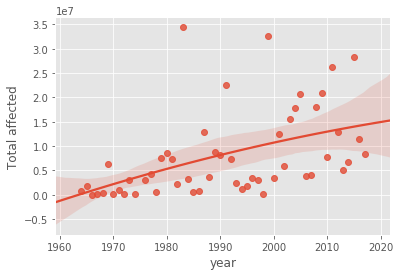

In [89]:
traces = []
for i in types:
    x = list(impact[impact.type == i]['year'])
    y = list(impact[impact.type == i]['Total affected'])
    trace = go.Scatter(
        x = x,
        y = y,
        mode = "markers",
        name = i,
        line=dict(width=0.1,color = color_dict[i]))
    traces.append(trace)  
    
regression_data_drought = pd.DataFrame({"Total affected" : list(impact[impact.type == "Drought"]['Total affected']), "year" : list(impact[impact.type == "Drought"]['year'])})

(Drought_Regression, path) = regression_path(regression_data_drought,"Total affected",2)

layout = add_layout("Disasters in Africa by total affected population <br> Regression line and  95%-confidence interval for Droughts",'Total Affected',-2000000,35000000)

traces.append(Drought_Regression)    
fig = dict(data=traces, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')

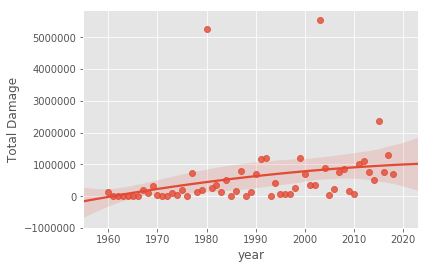

In [88]:
x = list(total_damage['year'])
y = list(total_damage['Total damage (US$)'])

trace = go.Scatter(
        x = x,
        y = y,
        mode = "markers",
        name = 'Damage',
        line=dict(width=0.1,color = porange))
        
regression_data_damage = pd.DataFrame({"Total Damage" : list(total_damage['Total damage (US$)']), "year" : list(total_damage['year'])})

(regression, path) = regression_path(regression_data_damage,"Total Damage",2)
layout = add_layout("Disasters in Africa by total damage <br> Regression line and  95%-confidence interval for total damage per year",'Total damage in US dollars ($)',-100000,1500000)

data = [trace, regression]     
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')

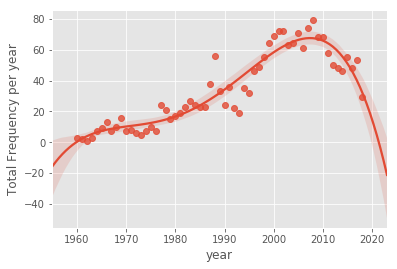

In [91]:
x = list(total_frequency['year'])
y = list(total_frequency['frequency'])

trace = go.Scatter(
        x = x,
        y = y,
        mode = "markers",
        name = 'Damage',
        line=dict(width=0.1,color = porange))
        
regression_data_damage = pd.DataFrame({"Total Frequency per year" : list(total_frequency['frequency']), "year" : list(total_frequency['year'])})

(regression, path) = regression_path(regression_data_damage,"Total Frequency per year",4)
layout = add_layout("Total frequency of environmental hazards with regression",'Total damage in US dollars ($)',0,100)

data = [trace, regression]     
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')

In [ ]:
df_emd_world = pd.read_csv("Disaster Data whole world 1960 - 2018.csv", sep = ';',encoding = 'latin-1')

In [102]:
#renaming environmental hazards dataframe to make it linkable with country information (see below)
df_emd_world = df_emd_world.rename({'Country Code': 'iso','disaster type':'type'}, axis = 1)

#only selecting the four hazards that influence agriculture (as definend by FAO 2017)
types = ["drought","Flood","Extreme temperature", "Storm"]
df_emd_all = df_emd_world[df_emd_world["type"].isin(types)]

#selecting right variables, period 2011 - 2016 and summate some variables per year and country (via iso)
df_emd_all = df_emd_all.groupby(["year", "iso"])[['occurrence','Total deaths','Total affected','Total damage']].sum().reset_index()
df_emd_all = df_emd_all[df_emd_all["year"]<2017]
df_2011_2016 = df_emd_all[df_emd_all["year"]>2010]
df_emd_done = df_2011_2016[["iso","occurrence"]]

#adding additional country information (about low & middle income groups)
country_names = pd.read_csv("country_names.csv", sep = ',')
#dropping high income countries and countries without information about income group
country_names = country_names[country_names["IncomeGroup"]!='High income']
country_names = country_names.dropna(axis=0, subset=['IncomeGroup']) 
#only keeping the columns with the right information
country_names = country_names[["Country Code","Region","IncomeGroup","TableName"]]
country_names = country_names.rename({'Country Code':'iso'}, axis=1)
#merge dataframe about worldwide hazards only keeping low & middle income countries
df_dummy = pd.merge(country_names,df_emd_done, right_on = 'iso',left_on = 'iso', how = 'inner')

#calculating occurrence within period 2011-2016 and adding dummy variable for high exposure ([dummy]=1) and low exposure ([dummy]=0)
df_dummy = df_2011_2016.groupby(['iso'])[["year"]].count().reset_index()
df_dummy['dummy'] = np.where(df_dummy['year']>4, 1, 0)
df_dummy = df_dummy.rename({'year':'occurence'}, axis=1)
#add country info back in 
df_dummy = pd.merge(df_dummy,country_names, left_on = 'iso', right_on = 'iso')

#add undernourishment information (could also be done with whole WDI table)
dfu = pd.read_csv("undernourisment_world.csv", sep = ',')
dfu = pd.melt(dfu, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'], var_name='Years')
dfu = dfu.rename({'Country Code': 'iso'}, axis = 1)
#put it into the dummy dataframe
dfu = pd.merge(df_dummy,dfu,left_on = 'iso', right_on = 'iso')
#only keeping year 2015 for the analysis
dfu2015 = dfu[dfu['Years']=='2015']

#extracting arrays for the independent T-Test Function
low_hazard = dfu2015[dfu2015["dummy"]==0]["value"].as_matrix()
high_hazard = dfu2015[dfu2015["dummy"]==1]["value"].as_matrix()

#performing t-test
t_test = stats.ttest_ind(low_hazardar, high_hazardar, nan_policy = 'omit')

dfpop1 = pd.read_csv("population_conv.csv",sep = ',')
dfpop = pd.melt(dfpop1, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'], var_name='Years')

#add population info to calculate total undernourished population 
dfpop = pd.read_csv("population_conv.csv",sep = ',')
dfpop = pd.melt(dfpop1, id_vars=['Country Name','Country Code','Indicator Name','Indicator Code'], var_name='Years')
dfpop = dfpop.rename({'Country Code': 'iso'}, axis = 1)
dfpop = dfpop[dfpop["Years"]=='2015']
dfpop = dfpop[["iso","value"]]
dfpop = dfpop.rename({'value':'population'}, axis=1)

#combine dataframes
df_total_2015 = pd.merge(dfpop,dfu2015,right_on = 'iso', left_on = 'iso')
df_total_2015 = df_total_2015[["iso","population","dummy","Country Name","value"]]
df_total_2015 = df_total_2015.rename({'value':'PoU'}, axis=1)

#combine undernourishment & population dataframe for low & middle income countries
dfpopfu2015 = pd.merge(dfpop,dfu2015,right_on = 'iso', left_on = 'iso')
dfpopfu2015 = dfpopfu2015[["iso","population","dummy","Country Name","value"]]
dfpopfu2015 = dfpopfu2015.rename({'value':'PoU'}, axis=1)
#calculate new column for total undernurist population 
dfpopfu2015["abs population undernourist"] = dfpopfu2015.population * (dfpopfu2015.PoU/100)

#calculate barchart values for total absolute population and PoU for countries with high & low exposure to climate extremes
df_total_2015["abs population undernourist"] = df_total_2015.population * (df_total_2015.PoU/100)
absolute_undernourishment = df_total_2015.groupby("dummy")["abs population undernourist"].sum()
average_undernourishment =  (dfu2015.groupby(["dummy"])["value"].sum())/ (dfu2015.groupby(["dummy"])["value"].count())



NameError: name 'df_emd_world' is not defined

In [94]:
#PLOT BARCHART HERE
data = [go.Bar(
            x=["low extreme","high extreme"],
            y=[135874820, 593711026],
            name='Absolute'),
        go.Scatter(
            x=["low extreme","high extreme"],
            y=[14.05,16.78],
            name='Percentage',
            mode = "markers",
            marker=dict(line=dict(color=porange, width=10)),
            yaxis = 'y2')]
layout = go.Layout(
            title='Higher number of undernourished people in countries with climate extremes',
            yaxis=dict(title= 'Absolute', range = [0,700000000], titlefont= dict(color=pblue),tickfont=dict(color=pblue),),
            yaxis2=dict(title='Percentage', showgrid=False, range = [13,16.9], titlefont= dict(color=porange),
            tickfont=dict(color=porange), 
            overlaying='y',
            anchor='free',
            side='right',
            position=1)
            )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='zero-hunger-indicators')